In [1]:
import pandas as pd
import json
from scipy.stats import zscore
import matplotlib.pyplot as plt

import re

with open(path + '4NSC.json',"r") as gfg_file:
    input_str = gfg_file.read()
output_str=re.sub(r'(\w*):', r'"\1":', input_str )
with open(path + '4NSC2.json', "w") as f:
    f.write(output_str)

In [2]:
path = '/home/lean/Documentos/Lean/SBG/Base_de_calcio/DiversidadConformacionalCBS/MCU/molecular dynamic/frames/NA/cavidb/'
with open(path + 'results.json') as json_data:
    data_na = json.load(json_data)

In [3]:
path = '/home/lean/Documentos/Lean/SBG/Base_de_calcio/DiversidadConformacionalCBS/MCU/cavidb/'
with open(path + '4nsc_frame0_result.json') as json_data:
    data = json.load(json_data)

In [4]:
path = '/home/lean/Documentos/Lean/SBG/Base_de_calcio/DiversidadConformacionalCBS/MCU/cavidb/'
with open(path + 'results.json') as json_data:
    data1000 = json.load(json_data)

In [5]:
def sortdict(dct, key_order):
    return {k:dct[k] for k in key_order}

data = sortdict(data, [0,5,1,3,4])
data_na = sortdict(data_na, [0,7,3,4,5,6])

### Datos por posición

In [6]:
# ASA z-score

ASA = {}
for conformero in data:
    ASA_per_position=[]
    for posicion in range(len(data[conformero]['residues'])):
        ASA_per_position.append(data[conformero]['residues'][posicion]['ASA'])
    ASA[data[conformero]['pdb_id']]=zscore(ASA_per_position)

ASA_per_position=[]
for posicion in range(len(data1000[0]['residues'])):
    ASA_per_position.append(data1000[0]['residues'][posicion]['ASA'])
ASA[data1000[0]['pdb_id']]=zscore(ASA_per_position)

In [7]:
# ASA z-score Na

ASA_na = {}
for conformero in data_na:
    ASA_per_position=[]
    for posicion in range(len(data_na[conformero]['residues'])):
        ASA_per_position.append(data_na[conformero]['residues'][posicion]['ASA'])
    ASA_na[data_na[conformero]['pdb_id']]=zscore(ASA_per_position)

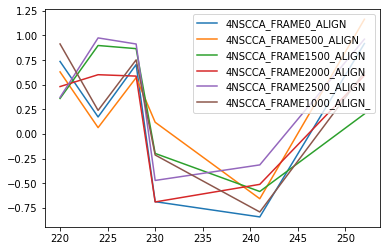

In [8]:
df_ASA = pd.DataFrame(ASA)
ASA_cav = df_ASA.iloc[[220, 224, 228, 230, 241, 252]]
plt.plot(ASA_cav)
plt.legend(ASA_cav.columns)

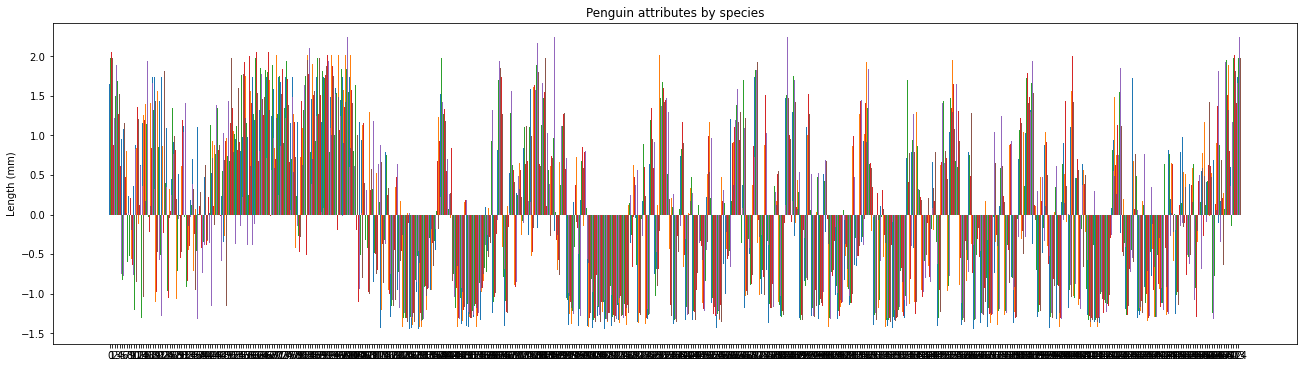

In [9]:
# data from https://allisonhorst.github.io/palmerpenguins/

import matplotlib.pyplot as plt
import numpy as np

positions = range(475)

x = np.arange(len(positions))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(18,5),layout='constrained')

for attribute, measurement in ASA.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Length (mm)')
ax.set_title('Penguin attributes by species')
ax.set_xticks(x + width, positions)

plt.show()

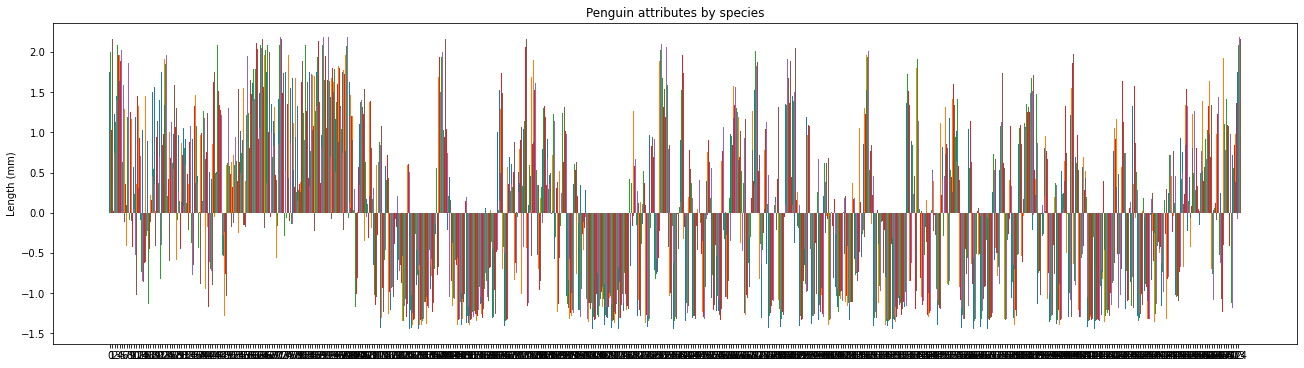

In [10]:
# data from https://allisonhorst.github.io/palmerpenguins/

import matplotlib.pyplot as plt
import numpy as np

positions = range(475)

x = np.arange(len(positions))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(18,5),layout='constrained')

for attribute, measurement in ASA_na.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Length (mm)')
ax.set_title('Penguin attributes by species')
ax.set_xticks(x + width, positions)

plt.show()

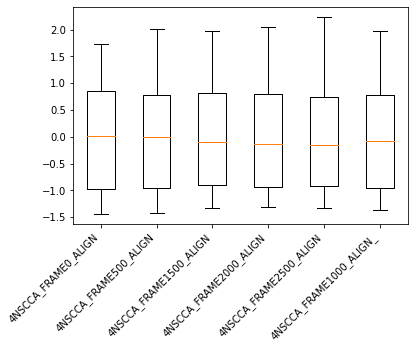

In [11]:
labels, datos = ASA.keys(), ASA.values()

plt.boxplot(datos)
plt.xticks(range(1, len(labels) + 1), labels, rotation=45,ha='right')
plt.show()

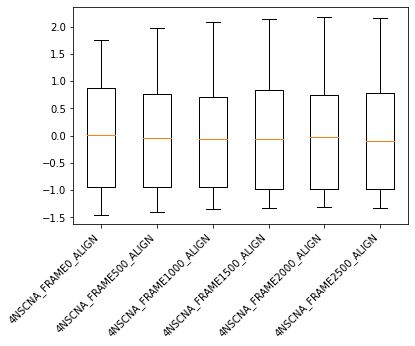

In [12]:
# Na
labels, datos = ASA_na.keys(), ASA_na.values()

plt.boxplot(datos)
plt.xticks(range(1, len(labels) + 1), labels, rotation=45,ha='right')
plt.show()

### Datos por cavidad

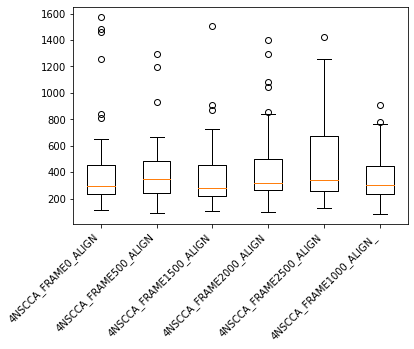

In [13]:
# Volumen

Volumen_cavidades = {}
for conformero in data:
    volume_per_cavity=[]
    for pocket_id in range(len(data[conformero]['pockets'])):
        volume_per_cavity.append(data[conformero]['pockets'][pocket_id]['monte_carlo_volume'])
    Volumen_cavidades[data[conformero]['pdb_id']]=volume_per_cavity
volume1000_per_cavity=[]
for pocket_id in range(len(data1000[0]['pockets'])):
    volume1000_per_cavity.append(data1000[0]['pockets'][pocket_id]['monte_carlo_volume'])

Volumen_cavidades[data1000[0]['pdb_id']]=volume1000_per_cavity    

labels, datos = Volumen_cavidades.keys(), Volumen_cavidades.values()

plt.boxplot(datos)
plt.xticks(range(1, len(labels) + 1), labels, rotation=45,ha='right')
plt.show()

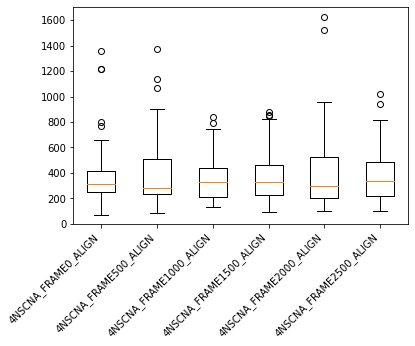

In [14]:
# Volumen Na

Volumen_cavidades_na = {}
for conformero in data_na:
    volume_per_cavity=[]
    for pocket_id in range(len(data_na[conformero]['pockets'])):
        volume_per_cavity.append(data_na[conformero]['pockets'][pocket_id]['monte_carlo_volume'])
    Volumen_cavidades_na[data_na[conformero]['pdb_id']]=volume_per_cavity  

labels, datos = Volumen_cavidades_na.keys(), Volumen_cavidades_na.values()

plt.boxplot(datos)
plt.xticks(range(1, len(labels) + 1), labels, rotation=45,ha='right')
plt.show()

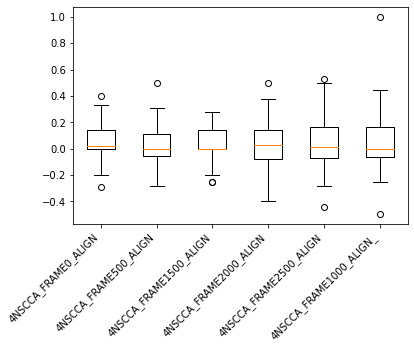

In [15]:
# Carga

carga_cavidades = {}
for conformero in data:
    carga_per_cavity=[]
    for pocket_id in range(len(data[conformero]['pockets'])):
        carga_per_cavity.append(data[conformero]['pockets'][pocket_id]['net_charge'])
    carga_cavidades[data[conformero]['pdb_id']]=carga_per_cavity
carga1000_per_cavity=[]
for pocket_id in range(len(data1000[0]['pockets'])):
    carga1000_per_cavity.append(data1000[0]['pockets'][pocket_id]['net_charge'])

carga_cavidades[data1000[0]['pdb_id']]=carga1000_per_cavity    

labels, datos = carga_cavidades.keys(), carga_cavidades.values()

plt.boxplot(datos)
plt.xticks(range(1, len(labels) + 1), labels, rotation=45,ha='right')
plt.show()

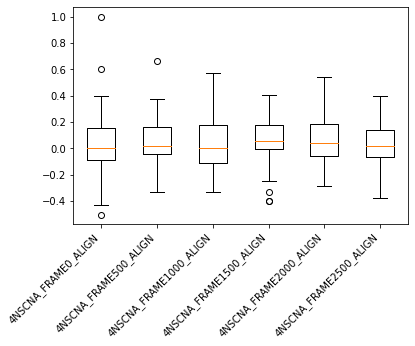

In [16]:
# Carga Na

carga_cavidades_na = {}
for conformero in data_na:
    carga_per_cavity=[]
    for pocket_id in range(len(data_na[conformero]['pockets'])):
        carga_per_cavity.append(data_na[conformero]['pockets'][pocket_id]['net_charge'])
    carga_cavidades_na[data_na[conformero]['pdb_id']]=carga_per_cavity

labels, datos = carga_cavidades_na.keys(), carga_cavidades_na.values()

plt.boxplot(datos)
plt.xticks(range(1, len(labels) + 1), labels, rotation=45,ha='right')
plt.show()

In [17]:
labels

dict_keys(['4NSCNA_FRAME0_ALIGN', '4NSCNA_FRAME500_ALIGN', '4NSCNA_FRAME1000_ALIGN', '4NSCNA_FRAME1500_ALIGN', '4NSCNA_FRAME2000_ALIGN', '4NSCNA_FRAME2500_ALIGN'])

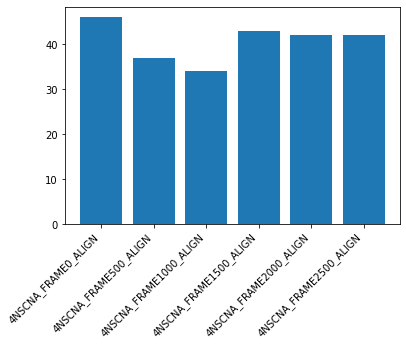

In [18]:
# N° de cavidades

n_cavidades = []
for conformero in data:
    n_cavidades.append(len(data[conformero]['pockets']))
n_cavidades.append(len(data1000[0]['pockets']))
plt.bar(labels,n_cavidades)
plt.xticks(range(0, len(labels)), labels, rotation=45,ha='right')
plt.show()

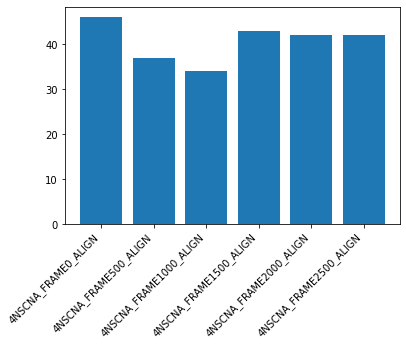

In [19]:
# N° de cavidades Na

n_cavidades_na = []
for conformero in data_na:
    n_cavidades_na.append(len(data_na[conformero]['pockets']))
plt.bar(labels,n_cavidades)
plt.xticks(range(0, len(labels)), labels, rotation=45,ha='right')
plt.show()

### Datos globales

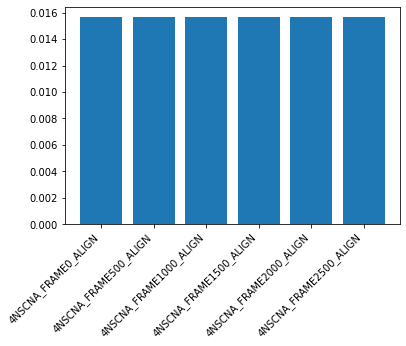

In [20]:
# carga

n_cavidades = []
for conformero in data:
    n_cavidades.append(data[conformero]['net_charge'])
n_cavidades.append(data1000[0]['net_charge'])
plt.bar(labels,n_cavidades)
plt.xticks(range(0, len(labels)), labels, rotation=45,ha='right')
plt.show()

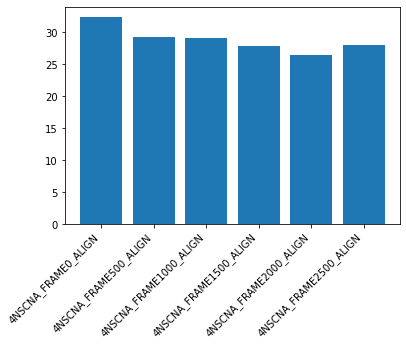

In [21]:
# carga

n_cavidades = []
for conformero in data:
    n_cavidades.append(data[conformero]['radius_of_gyration'])
n_cavidades.append(data1000[0]['radius_of_gyration'])

plt.bar(labels,n_cavidades)
plt.xticks(range(0, len(labels)), labels, rotation=45,ha='right')
plt.show()

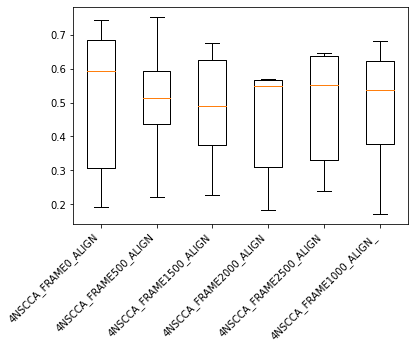

In [22]:
lista_sitios = [241, 252, 220, 230, 224, 228]

ASA_cbs = {}
for conformero in data:
    asa_per_cavity=[]
    for position_id in range(len(data[conformero]['residues'])):
        if position_id in lista_sitios:
            asa_per_cavity.append(data[conformero]['residues'][position_id]['ASA'])
    ASA_cbs[data[conformero]['pdb_id']]=asa_per_cavity
asa1000_per_cavity=[]
for position_id in range(len(data1000[0]['residues'])):
    if position_id in lista_sitios:
        asa1000_per_cavity.append(data1000[0]['residues'][position_id]['ASA'])
ASA_cbs[data1000[0]['pdb_id']]=asa1000_per_cavity    
labels, datos = ASA_cbs.keys(), ASA_cbs.values()

plt.boxplot(datos)
plt.xticks(range(1, len(labels) + 1), labels, rotation=45,ha='right')
plt.show()

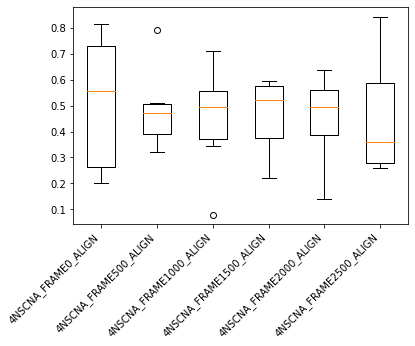

In [23]:
lista_sitios = [241, 252, 220, 230, 224, 228]

ASA_cbs_na = {}
for conformero in data_na:
    asa_per_cavity=[]
    for position_id in range(len(data_na[conformero]['residues'])):
        if position_id in lista_sitios:
            asa_per_cavity.append(data_na[conformero]['residues'][position_id]['ASA'])
    ASA_cbs_na[data_na[conformero]['pdb_id']]=asa_per_cavity

labels, datos = ASA_cbs_na.keys(), ASA_cbs_na.values()

plt.boxplot(datos)
plt.xticks(range(1, len(labels) + 1), labels, rotation=45,ha='right')
plt.show()

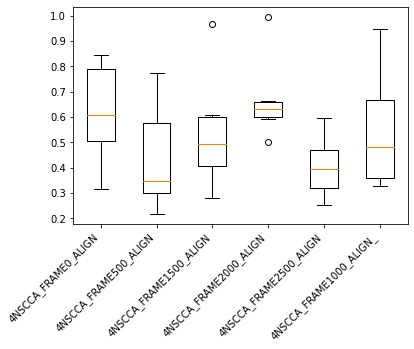

In [24]:
lista_sitios = [199, 195, 184, 137, 198, 138]

ASA_cbs = {}
for conformero in data:
    asa_per_cavity=[]
    for position_id in range(len(data[conformero]['residues'])):
        if position_id in lista_sitios:
            asa_per_cavity.append(data[conformero]['residues'][position_id]['ASA'])
    ASA_cbs[data[conformero]['pdb_id']]=asa_per_cavity
asa1000_per_cavity=[]
for position_id in range(len(data1000[0]['residues'])):
    if position_id in lista_sitios:
        asa1000_per_cavity.append(data1000[0]['residues'][position_id]['ASA'])
ASA_cbs[data1000[0]['pdb_id']]=asa1000_per_cavity    
labels, datos = ASA_cbs.keys(), ASA_cbs.values()

plt.boxplot(datos)
plt.xticks(range(1, len(labels) + 1), labels, rotation=45,ha='right')
plt.show()

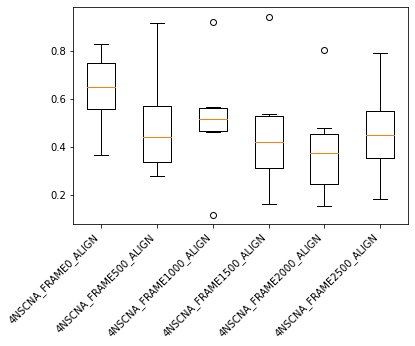

In [25]:
lista_sitios = [199, 195, 184, 137, 198, 138]

ASA_cbs_na = {}
for conformero in data_na:
    asa_per_cavity=[]
    for position_id in range(len(data_na[conformero]['residues'])):
        if position_id in lista_sitios:
            asa_per_cavity.append(data_na[conformero]['residues'][position_id]['ASA'])
    ASA_cbs_na[data_na[conformero]['pdb_id']]=asa_per_cavity

labels, datos = ASA_cbs_na.keys(), ASA_cbs_na.values()

plt.boxplot(datos)
plt.xticks(range(1, len(labels) + 1), labels, rotation=45,ha='right')
plt.show()

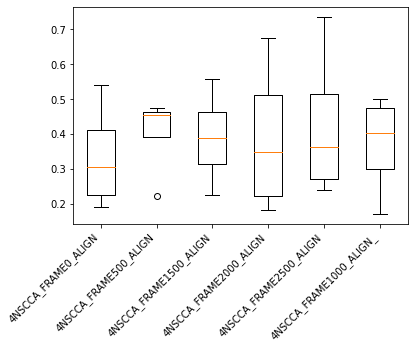

In [26]:
lista_sitios = [230, 234, 236, 241]

ASA_cbs = {}
for conformero in data:
    asa_per_cavity=[]
    for position_id in range(len(data[conformero]['residues'])):
        if position_id in lista_sitios:
            asa_per_cavity.append(data[conformero]['residues'][position_id]['ASA'])
    ASA_cbs[data[conformero]['pdb_id']]=asa_per_cavity
asa1000_per_cavity=[]
for position_id in range(len(data1000[0]['residues'])):
    if position_id in lista_sitios:
        asa1000_per_cavity.append(data1000[0]['residues'][position_id]['ASA'])
ASA_cbs[data1000[0]['pdb_id']]=asa1000_per_cavity    
labels, datos = ASA_cbs.keys(), ASA_cbs.values()

plt.boxplot(datos)
plt.xticks(range(1, len(labels) + 1), labels, rotation=45,ha='right')
plt.show()

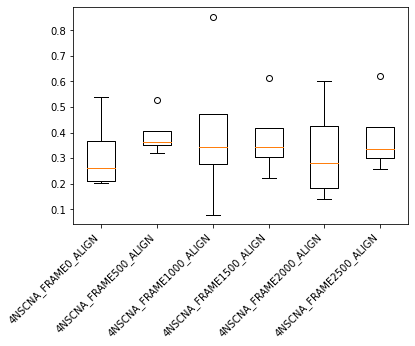

In [27]:
lista_sitios = [230, 234, 236, 241]

ASA_cbs_na = {}
for conformero in data_na:
    asa_per_cavity=[]
    for position_id in range(len(data_na[conformero]['residues'])):
        if position_id in lista_sitios:
            asa_per_cavity.append(data_na[conformero]['residues'][position_id]['ASA'])
    ASA_cbs_na[data_na[conformero]['pdb_id']]=asa_per_cavity

labels, datos = ASA_cbs_na.keys(), ASA_cbs_na.values()

plt.boxplot(datos)
plt.xticks(range(1, len(labels) + 1), labels, rotation=45,ha='right')
plt.show()

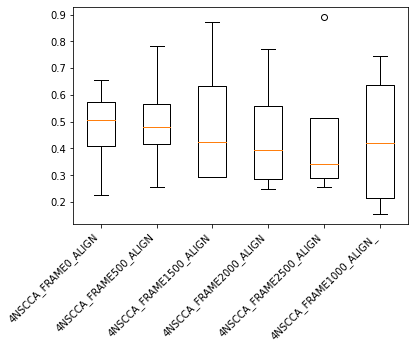

In [28]:
lista_sitios = [420, 424, 426, 431]

ASA_cbs = {}
for conformero in data:
    asa_per_cavity=[]
    for position_id in range(len(data[conformero]['residues'])):
        if position_id in lista_sitios:
            asa_per_cavity.append(data[conformero]['residues'][position_id]['ASA'])
    ASA_cbs[data[conformero]['pdb_id']]=asa_per_cavity
asa1000_per_cavity=[]
for position_id in range(len(data1000[0]['residues'])):
    if position_id in lista_sitios:
        asa1000_per_cavity.append(data1000[0]['residues'][position_id]['ASA'])
ASA_cbs[data1000[0]['pdb_id']]=asa1000_per_cavity    
labels, datos = ASA_cbs.keys(), ASA_cbs.values()

plt.boxplot(datos)
plt.xticks(range(1, len(labels) + 1), labels, rotation=45,ha='right')
plt.show()

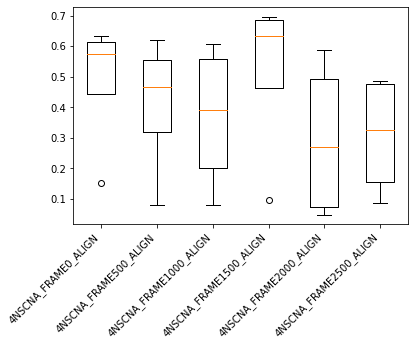

In [29]:
lista_sitios = [420, 424, 426, 431]

ASA_cbs_na = {}
for conformero in data_na:
    asa_per_cavity=[]
    for position_id in range(len(data_na[conformero]['residues'])):
        if position_id in lista_sitios:
            asa_per_cavity.append(data_na[conformero]['residues'][position_id]['ASA'])
    ASA_cbs_na[data_na[conformero]['pdb_id']]=asa_per_cavity

labels, datos = ASA_cbs_na.keys(), ASA_cbs_na.values()

plt.boxplot(datos)
plt.xticks(range(1, len(labels) + 1), labels, rotation=45,ha='right')
plt.show()

In [31]:
data_index = [0,5,1,3,4]
data_index_na = [0,7,3,4,5,6]

positions_list = [231, 233, 235, 237, 242]
contactos = pd.DataFrame()
for conformero in data_index_na:
    df_contactos_conformero = pd.DataFrame(data_na[conformero]['residues'], columns=['position', 'pocket_ids', 'aa_unicode', 'SCHBOND_count', 'BBHBond_count', 'COULOMBIC_count', 'pka', 'pka_shift', 'COULOMBIC_sum', 'BBHBond_sum', 'SCHBOND_sum'])
    residues_sum = df_contactos_conformero[df_contactos_conformero['position'].isin(positions_list)]
    contactos = contactos.append(residues_sum)
contactos = contactos.reset_index(drop=True)

In [32]:
contactos

,position,pocket_ids,aa_unicode,SCHBOND_count,BBHBond_count,COULOMBIC_count,pka,pka_shift,COULOMBIC_sum,BBHBond_sum,SCHBOND_sum
0,231,[],D,3.0,3.0,2.0,1.58,-2.22,"[{'residue': 'LYS', 'position': 228, 'energy':...","[{'energy': -0.75, 'position': 233, 'residue':...","[{'energy': -0.75, 'position': 233, 'residue':..."
1,233,[],N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,235,[],D,2.0,2.0,2.0,2.19,-1.61,"[{'energy': 0.19, 'position': 231, 'residue': ...","[{'energy': -0.15, 'residue': 'ASP', 'position...","[{'energy': -0.77, 'position': 233, 'residue':..."
3,237,[],E,0.0,0.0,3.0,4.98,0.48,"[{'residue': 'LYS', 'position': 290, 'energy':...",[],[]
4,242,[],E,1.0,1.0,4.0,4.55,0.05,"[{'position': 290, 'residue': 'LYS', 'energy':...","[{'position': 239, 'residue': 'ASP', 'energy':...",[]
5,231,[20],D,3.0,3.0,1.0,2.35,-1.45,"[{'energy': -0.2, 'position': 228, 'residue': ...","[{'position': 232, 'residue': 'LEU', 'energy':...",[]
6,233,[20],N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,235,[20],D,1.0,1.0,3.0,3.77,-0.03,"[{'energy': -0.06, 'residue': 'LYS', 'position...","[{'energy': -0.51, 'position': 235, 'residue':...",[]
8,237,[20],E,0.0,0.0,6.0,4.88,0.38,"[{'residue': 'LYS', 'position': 290, 'energy':...",[],[]
9,242,[20],E,1.0,1.0,4.0,4.15,-0.35,"[{'position': 290, 'residue': 'LYS', 'energy':...","[{'residue': 'ASP', 'position': 239, 'energy':...",[]


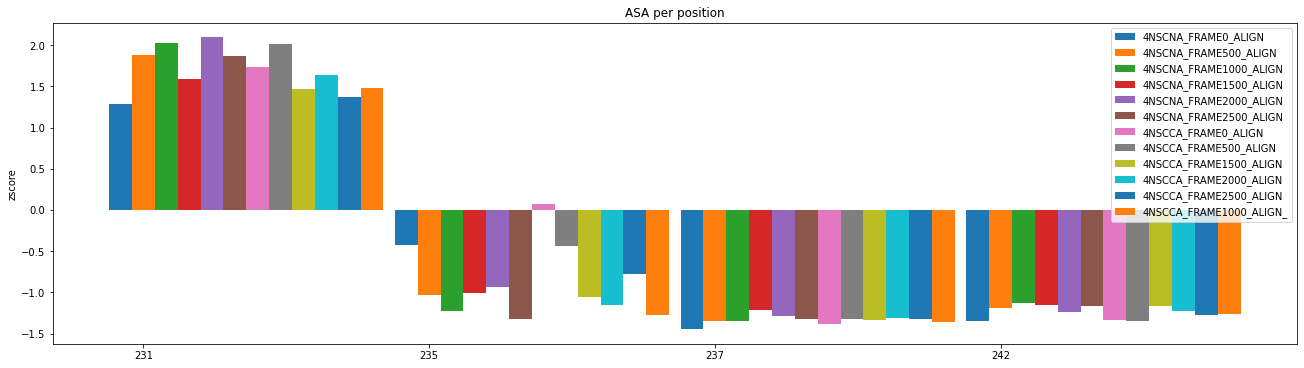

In [91]:
# data from https://allisonhorst.github.io/palmerpenguins/

import matplotlib.pyplot as plt
import numpy as np

positions = [231, 235, 237, 242]

x = np.arange(len(positions))  # the label locations
width = 0.08  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(18,5),layout='constrained')

for attribute, measurement in ASA_na.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement[positions], width, label=attribute)
    multiplier += 1

for attribute, measurement in ASA.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement[positions], width, label=attribute)
    multiplier += 1
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('zscore')
ax.set_title('ASA per position')
ax.set_xticks(x + width, positions)
ax.legend()

plt.show()

In [30]:
# Interacción MCU ---> 106 107 110 111 114 117 121
# Interacción EMRE ---> 126 129 / idx 218
# Interacción MICU2 ---> 352
# Interfase I ---> 242 253 221 231 225 229
# Interfase II ---> 383 385 427 398 386
# Sitios de unión a Ca2+ ---> 231 235 237 242 
#                        ---> 421 425 427 432
#                        ---> ¿200 196 185 138 199 139

- Distribución de ASA por posición
- Contactos de los sitios de unión a Ca
- Estudiar las distancias
- Hacer los gráficos con el diferencial de ASA respecto del Control 0Ca
- Analizar el 0Ca